# Train Models

In [1]:
%run src/data/helper.py

In [2]:
%run src/data/visualization.py

In [12]:
%matplotlib inline

import math
import time
import pandas as pd
import numpy as np
from datetime import datetime 

In [4]:
import pickle

statistics = pickle.load(open('data/parsed/stations_statistics.p', 'rb'))
stations = pickle.load(open('data/parsed/stations_dataset_final.p', 'rb'))
readings = pickle.load(open("data/parsed/readings_model.p", "rb"))

## Fill Redistribution

In [5]:
readings.DistNbBikes = readings.DistNbBikes.fillna(method='ffill', limit=0).fillna(0)
readings.CollNbBikes = readings.CollNbBikes.fillna(method='ffill', limit=0).fillna(0)

## Column Analysis

In [7]:
columns = ['CollNbBikes', 'DewPt', 'DistNbBikes', 'Humidity', 'NbBikes', 'Rain', 'Temp', 'Visibility',
           'WindSpeed', 'TimeOfYear', 'TimeOfDay']
#columns = ['NbBikes', 'Rain', 'Temp']

data = readings[columns]

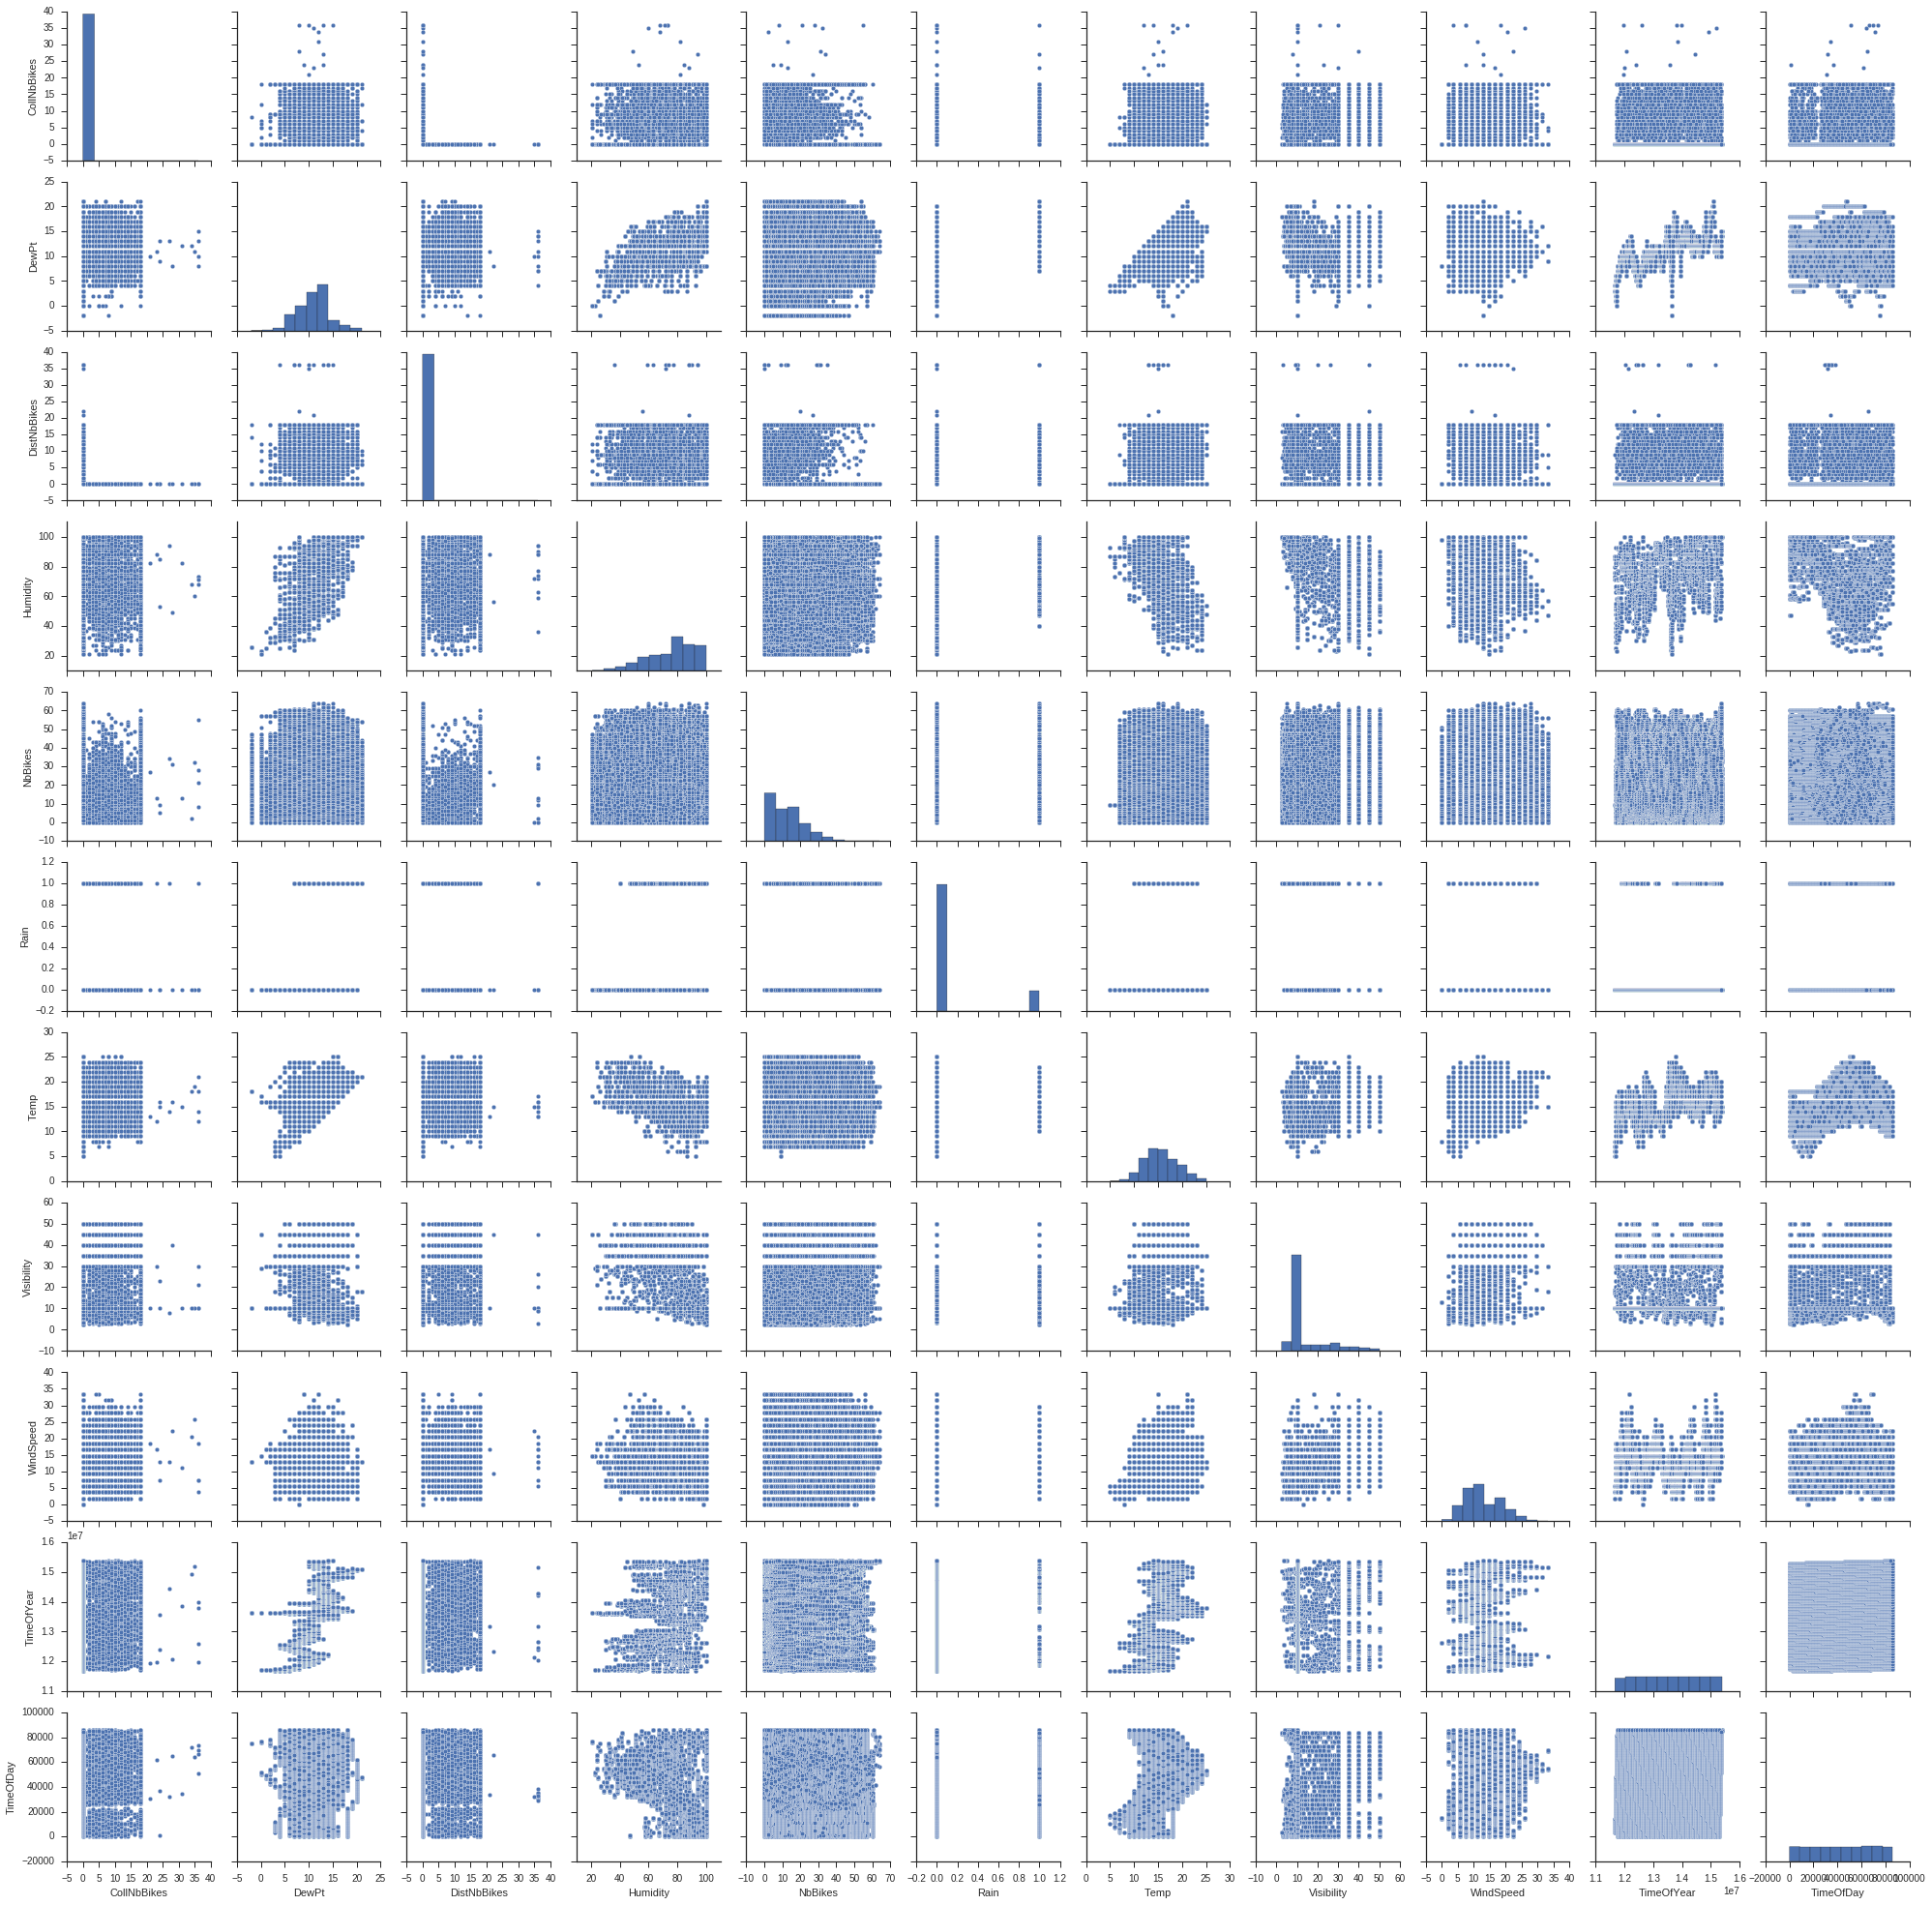

In [9]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

In [11]:
corr = data.corr()

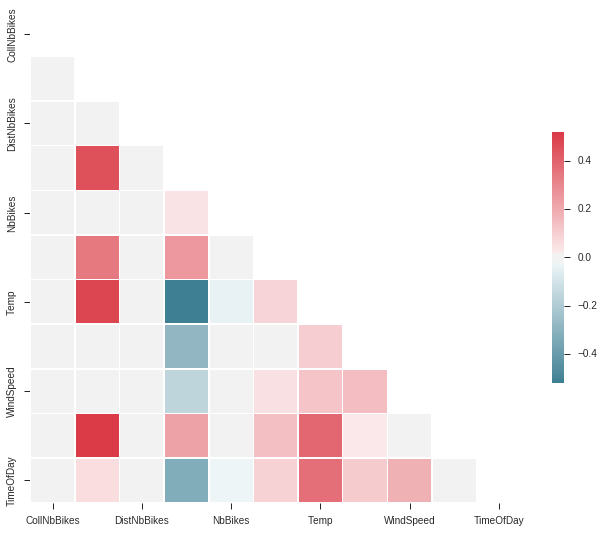

In [19]:
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Clusters

### NAB

A station’s data is normalized by dividing each observation by the inferred station size. In particular, analyses presented in this paper will be carried out using normalized available bicycles (NAB), unless specified otherwise. Note that NAB is analogous to the station’s percentage full

In this equation, α stands for the number of available bikes at time t, β stands for the number of available bike stands at time t. Since the sum of available bikes and available bike slots is not a constant (some bikes or bike slots may be damaged, so we cannot use them), NAB can effectively reflect the percentage of available bikes

In [14]:
readings['NAB'] = readings.NbBikes / (readings.NbBikes + readings.NbEmptyDocks)
readings['NAS'] = (readings.NbBikesTMinus1 - readings.NbBikes).apply(math.fabs) / (readings.NbBikes + readings.NbEmptyDocks)

In [197]:
readings.reset_index(level=1, drop=False)

,Timestamp,CollNbBikes,DewPt,DistNbBikes,Fog,Hail,Humidity,NbBikes,NbDocks,NbEmptyDocks,...,FogTMinus1,TempTMinus12,HumidityTMinus12,NbBikesTMinus1,NbBikesTMinus2,NbBikesTMinus12,NbBikesTMinus18,NbBikesTMinus24,NAB,NAS
Id,,,,,,,,,,,,,,,,,,,,,
BikePoints_1,2016-05-15 13:35:00+00:00,NaN,1.0,NaN,0,0.0,36.0,6,19,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN
BikePoints_1,2016-05-15 13:40:00+00:00,NaN,1.0,NaN,0,0.0,36.0,6,19,12,...,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.333333,0.000000
BikePoints_1,2016-05-15 13:45:00+00:00,NaN,1.0,NaN,0,0.0,36.0,6,19,12,...,0.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,0.333333,0.000000
BikePoints_1,2016-05-15 13:50:00+00:00,NaN,2.0,NaN,0,0.0,39.0,6,19,12,...,0.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,0.333333,0.000000
BikePoints_1,2016-05-15 13:55:00+00:00,NaN,2.0,NaN,0,0.0,39.0,6,19,12,...,0.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,0.333333,0.000000
BikePoints_1,2016-05-15 14:00:00+00:00,NaN,0.0,NaN,0,0.0,23.0,6,19,12,...,0.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,0.333333,0.000000
BikePoints_1,2016-05-15 14:05:00+00:00,NaN,0.0,NaN,0,0.0,23.0,6,19,12,...,0.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,0.333333,0.000000
BikePoints_1,2016-05-15 14:10:00+00:00,NaN,0.0,NaN,0,0.0,23.0,6,19,12,...,0.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,0.333333,0.000000
BikePoints_1,2016-05-15 14:15:00+00:00,NaN,0.0,NaN,0,0.0,23.0,6,19,12,...,0.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,0.333333,0.000000


In [187]:
dayviews = readings[['NAB', 'NAS', 'TimeOfDay','Weekday']].dropna().reset_index().groupby(['Weekday', 'Id', 'TimeOfDay']).mean()#.unstack()

[3600,
 7200,
 10800,
 14400,
 18000,
 21600,
 25200,
 28800,
 32400,
 36000,
 39600,
 43200,
 46800,
 50400,
 54000,
 57600,
 61200,
 64800,
 68400,
 72000,
 75600,
 79200,
 82800,
 86400]

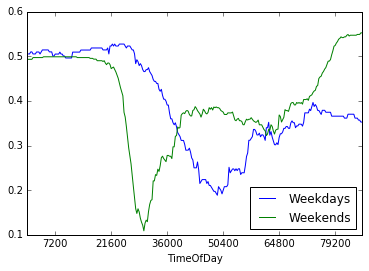

In [207]:
station_id = 'BikePoints_1'
pd.concat([dayviews.loc[0, station_id].NAB.rename('Weekdays'), 
           dayviews.loc[1, station_id].NAB.rename('Weekends')], 
          axis=1).plot(xticks = range(7200, 25 * m, 14400))

In [190]:
dayviews.unstack().loc[1]

NAB                                                    \
TimeOfDay        0.0       300.0     600.0     900.0     1200.0    1500.0    
Id                                                                           
BikePoints_1    0.493091  0.493091  0.493091  0.493091  0.493091  0.497013   
BikePoints_10   0.280569  0.282530  0.282530  0.282530  0.280678  0.280678   
BikePoints_100  0.589970  0.595767  0.594252  0.601499  0.598396  0.601174   
BikePoints_101  0.034782  0.034782  0.031600  0.031600  0.033188  0.030157   
BikePoints_102  0.084992  0.084992  0.084992  0.087075  0.087075  0.087075   
BikePoints_103  0.341176  0.343028  0.341176  0.341176  0.339325  0.337364   
BikePoints_104  0.194902  0.194902  0.190000  0.190000  0.191041  0.186279   
BikePoints_105  0.714154  0.712872  0.712872  0.711590  0.717949  0.719282   
BikePoints_106  0.017778  0.017778  0.017778  0.017778  0.016190  0.016190   
BikePoints_107  0.459121  0.459121  0.457367  0.447367  0.447454  0.447454   
BikePoints_108  0.120355  0.115593  0.112021  0.112021  0.112021  0.112021   
BikePoints_11   0.221659  0.221659  0.221659  0.220270  0.218821  0.218821   
BikePoints_110  0.612010  0.612010  0.612010  0.612010  0.612010  0.606127   
BikePoints_111  0.183947  0.188709  0.185138  0.185094  0.183903  0.187475   
BikePoints_113  0.557212  0.559064  0.562573  0.566179  0.569688  0.569591   
BikePoints_114  0.518401  0.516734  0.513552  0.516583  0.522788  0.521272   
BikePoints_115  0.071782  0.072701  0.072701  0.071660  0.072701  0.073743   
BikePoints_116  0.019444  0.019444  0.019444  0.019444  0.014683  0.013016   
BikePoints_117  0.846133  0.846078  0.840522  0.840522  0.840522  0.841911   
BikePoints_118  0.147261  0.147261  0.144697  0.144697  0.144697  0.144697   
BikePoints_119  0.182062  0.184131  0.184240  0.176833  0.173129  0.173129   
BikePoints_12   0.046684  0.048045  0.048045  0.046684  0.046684  0.046004   
BikePoints_121  0.059953  0.059953  0.059953  0.058198  0.058198  0.058198   
BikePoints_122  0.017457  0.016008  0.016008  0.014493  0.016080  0.016080   
BikePoints_123  0.456808  0.464325  0.462364  0.460403  0.460403  0.460403   
BikePoints_124  0.385614  0.387281  0.385614  0.385614  0.385614  0.387281   
BikePoints_125  0.541287  0.541207  0.538200  0.541374  0.537865  0.536358   
BikePoints_126  0.013665  0.011704  0.011704  0.012357  0.011716  0.013024   
BikePoints_127  0.027574  0.025613  0.025613  0.025613  0.025613  0.025613   
BikePoints_128  0.619033  0.622063  0.622063  0.626609  0.626609  0.625094   
...                  ...       ...       ...       ...       ...       ...   
BikePoints_788  0.395938  0.395938  0.395938  0.395938  0.398021  0.398021   
BikePoints_789  0.577701  0.575899  0.575899  0.575899  0.574919  0.574919   
BikePoints_792  0.320218  0.320218  0.320218  0.320218  0.319385  0.319385   
BikePoints_794  0.911508  0.911508  0.911508  0.911508  0.911508  0.911508   
BikePoints_795  0.678283  0.681855  0.680664  0.681855  0.685426  0.686616   
BikePoints_8    0.573203  0.575054  0.575054  0.575054  0.575054  0.575054   
BikePoints_80   0.644600  0.644600  0.644600  0.644600  0.644600  0.644600   
BikePoints_800  0.779036  0.777925  0.777925  0.777925  0.777925  0.777925   
BikePoints_801  0.210720  0.213060  0.213060  0.209612  0.205014  0.205014   
BikePoints_804  0.401584  0.401584  0.401533  0.400251  0.400251  0.397782   
BikePoints_808  0.918687  0.918687  0.919729  0.919729  0.919729  0.919729   
BikePoints_81   0.076706  0.074951  0.074951  0.076706  0.081969  0.080214   
BikePoints_815  0.590269  0.590269  0.593126  0.593126  0.595087  0.598984   
BikePoints_82   0.047937  0.045714  0.043492  0.041111  0.041111  0.041111   
BikePoints_83   0.092820  0.094398  0.092732  0.094319  0.097820  0.099407   
BikePoints_84   0.033944  0.033944  0.033944  0.032611  0.032611  0.032611   
BikePoints_85   0.750023  0.749169  0.749169  0.750023  0.753357  0.753357   
BikePoints_87   0.041667  0.041667  0.03958

In [6]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
for col in statistics.columns.difference(['Latitude', 'Longitude', 'Priority']):
    std_col = '%sS' % col    
    statistics[std_col] = min_max_scaler.fit_transform(statistics[col].values.reshape(-1, 1))

/home/jfconavarrete/Documents/Work/Config/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn.cluster import KMeans

statistics = statistics.sort_values(by=['Priority'])

priority_clusters = [(3,1), (2,2), (2,3)]
cluster_cols = ['EmptyEveningPeakS', 'EmptyMorningPeakS', 'EmptyNonPeakS', 
                'FullEveningPeakS', 'FullMorningPeakS', 'FullNonPeakS',
                'CountS']

clusters = []
offset = 0
for cls_prior in priority_clusters:
    n_clusters, priority = cls_prior
    window = statistics[statistics.Priority == priority][cluster_cols]
    p_clusters = KMeans(n_clusters=n_clusters).fit_predict(window.values)
    clusters.extend(p_clusters + offset) 
    
    offset += n_clusters
    
statistics['Cluster'] = clusters

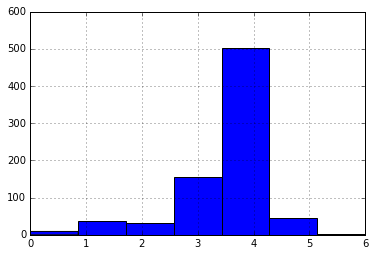

In [8]:
statistics.Cluster.hist(bins=7)

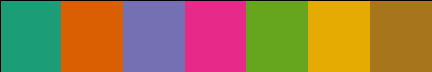

In [9]:
Dark2_7.show_discrete_image()

In [10]:
draw_stations_map(statistics, create_cluster_marker('Cluster'))

## Split Dataset

In [11]:
split_training = lambda df: df[datetime(2016,5,15,0,0,0,0):datetime(2016,6,12,23,59,59,999999)]
split_validation = lambda df: df[datetime(2016,6,13,0,0,0,0):datetime(2016,6,19,23,59,59,999999)]
split_test = lambda df: df[datetime(2016,5,20,0,0,0,0):datetime(2016,6,26,23,59,59,999999)]

In [14]:
cluster0 = statistics[statistics.Cluster == 0].index
cluster0

Index([u'BikePoints_404', u'BikePoints_154', u'BikePoints_153',
       u'BikePoints_553', u'BikePoints_361', u'BikePoints_374',
       u'BikePoints_307', u'BikePoints_336', u'BikePoints_334'],
      dtype='object', name=u'Id')

In [16]:
readings.loc[cluster0.values].head()

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
readings2

## Model

In [26]:
def split_datasets(df, station_id):
    station_df = df.loc[station_id]
    training = split_training(station_df)
    validation = split_validation(station_df)
    test = split_test(station_df)
    
    return training, validation, test

In [27]:
import sys

def clip_and_round(arr):
    arr = np.clip(arr, 0, sys.maxint)
    return np.round(arr)

In [28]:
import inspect

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error

from rpy2 import robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import IntVector, Formula

pandas2ri.activate()

r = robjects.r
base = importr('base')
stats = importr('stats')
mgcv = importr('mgcv')

class GAMRegressor(BaseEstimator, RegressorMixin):  
    """An example of classifier"""

    def __init__(self, features=None, formula_str=None,
                 Fog_parametric=None, Rain_parametric=None, TempAndHumidity_k=None,
                 TMinus1_k=None, TMinus2_k=None, 
                 TMinus6_k=None, TMinus12_k=None, 
                 TimeOfYear_k=None, 
                 TimeOfDay_1_k=None, TimeOfDay_2_k=None, TimeOfDay_3_k=None,
                 TimeOfDay_1_bs=None, TimeOfDay_2_bs=None, TimeOfDay_3_bs=None,
                 TimeOfDay_1_by=None, TimeOfDay_2_by=None, TimeOfDay_3_by=None):
        
        args, _, _, values = inspect.getargvalues(inspect.currentframe())
        values.pop("self")

        self.args_to_set = []
        for arg, val in values.items():
            # save a list of the arguments
            if arg != 'features' and arg != 'formula_str':
                self.args_to_set.append(arg)
            setattr(self, arg, val)

    def fit(self, X, y=None): 
        if self.formula_str is None:
            features_dicts = self.build_features_dicts()
            self.formula_str = self.build_formula_str(features_dicts)
            #print self.formula_str
            
        self.gam = mgcv.gam(Formula(self.formula_str), data=X)
        
        return self

    def predict(self, X):
        assert (self.gam is not None), "GAM must be set"
        p_val = clip_and_round(stats.predict(self.gam, newdata=X))
        return p_val
    
    def score(self, X):
        p_val = self.predict(X)
        y_val = X.NbBikes
        rmse = mean_squared_error(y_val, p_val)**0.5
        return rmse * (-1)
    
    def build_features_dicts(self):
        assert (self.features is not None), "features must be set"
        
        # initialize the dictionaries
        features_dicts = {}
        for feature in self.features:
            features_dicts[feature] = {
                'name': feature,
                'bs': 'tp',
                'sp': None,
                'by': None,
                'k': None,
                'parametric': False
            }
            
        # set parameter values
        for arg in self.args_to_set:
            val = getattr(self, arg)
            if val is None:
                continue
            feature, parameter = arg.rsplit('_',1)
            features_dicts[feature][parameter] = val
            
        return features_dicts
    
    def build_formula_str(self, features_dicts):
        formula = 'NbBikes ~ '
        for feature, feature_dict in features_dicts.iteritems():
            if feature_dict['parametric']:
                formula += '%(name)s+' % feature_dict
                continue
                                
            tokens = feature_dict['name'].split('_')
            name, index = (tokens[0],None) if len(tokens) == 1 else (tokens[0], tokens[1])
            formula += "s(%s" % name.replace('And', ',')
            
            if feature_dict['bs'] is not None:
                formula += ", bs='%s'" % feature_dict['bs']
            if feature_dict['sp'] is not None:
                formula += ", sp=%0.3f" % feature_dict['sp']
            if feature_dict['by'] is not None:
                formula += ", by=%s" % feature_dict['by']
            if feature_dict['k'] is not None:
                formula += ", k=%s" % feature_dict['k']
                
            formula += ")+" % feature_dict
        return formula[:-1]

In [29]:
from sklearn.linear_model import LinearRegression

def fit_and_predict_lm(X_train, y_train, X_val):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    return lm, clip_and_round(lm.predict(X_val))

In [30]:
def fit_and_predict_gam(training, validation, formula):
    gam = GAMRegressor(formula_str=formula)
    gam.fit(training)
    return gam, clip_and_round(gam.predict(validation))

In [31]:
def model(df, station_ids, gam_formula, feature_cols, pred_col):
    results = []

    for station_id in station_ids:
        print 'Fitting %s' % station_id
            
        training, validation, test = split_datasets(df, station_id)                
        
        X_train, y_train = training[feature_cols], training[pred_col]
        X_val, y_val = validation[feature_cols], validation[pred_col]
        
        try:            
            # Linear Model
            lm_fit = fit_and_predict_lm(X_train, y_train, X_val)
            lm_rmse = mean_squared_error(y_val, lm_fit[1])**0.5
        
            # GAM Model
            gam_fit = fit_and_predict_gam(training, validation, gam_formula)
            gam_rmse = mean_squared_error(y_val, gam_fit[1])**0.5
        except:
            print 'Error in station %s' % station_id
        
        results.append({'Id': station_id, 'LM': lm_rmse, 'GAM': gam_rmse, 'LM_p': lm_fit[1], 'GAM_p': gam_fit[1]})
        
    return results

### Short Term

In [ ]:
# choose the columns to use in the model
boolean_cols_short = ['Weekday', 'Weekend', 'Holiday', 'RainTMinus1', 'FogTMinus1']
numeric_cols_short = ['HumidityTMinus1', 'TempTMinus1', 'TimeOfDay', 'NbBikesTMinus1', 'NbBikesTMinus2']
pred_col_short = 'NbBikes'

feature_cols_short = numeric_cols_short + boolean_cols_short
cols_short = [pred_col_short] + feature_cols_short

# select the columns chosen columns
readings_short = readings[cols_short].copy()

# remove na
readings_short.dropna(inplace=True)

In [ ]:
gam_formula_short = "NbBikes ~ s(TempTMinus1, HumidityTMinus1, bs='tp') + s(TimeOfDay, by=Weekday, bs='tp') "  
gam_formula_short += "+ s(TimeOfDay, by=Weekend, bs='tp') + s(TimeOfDay, by=Holiday, bs='tp') + s(NbBikesTMinus1, bs='tp') "
gam_formula_short += "+ s(NbBikesTMinus2, bs='tp') + RainTMinus1 + FogTMinus1 "

station_ids = readings_short.index.get_level_values('Id').unique()        
results_short = model(readings_short, station_ids, gam_formula_short, feature_cols_short, pred_col_short)

Fitting BikePoints_1
Fitting BikePoints_10
Fitting BikePoints_100
Fitting BikePoints_101
Fitting BikePoints_102
Fitting BikePoints_103
Fitting BikePoints_104
Fitting BikePoints_105
Fitting BikePoints_106
Fitting BikePoints_107
Fitting BikePoints_108
Fitting BikePoints_11
Fitting BikePoints_110
Fitting BikePoints_111
Fitting BikePoints_113
Fitting BikePoints_114
Fitting BikePoints_115
Fitting BikePoints_116
Fitting BikePoints_117
Fitting BikePoints_118
Fitting BikePoints_119
Fitting BikePoints_12
Fitting BikePoints_121
Fitting BikePoints_122
Fitting BikePoints_123
Fitting BikePoints_124
Fitting BikePoints_125
Fitting BikePoints_126
Fitting BikePoints_127
Fitting BikePoints_128
Fitting BikePoints_13
Fitting BikePoints_130
Fitting BikePoints_131
Fitting BikePoints_132
Fitting BikePoints_134
Fitting BikePoints_135
Fitting BikePoints_136
Fitting BikePoints_137
Fitting BikePoints_138
Fitting BikePoints_139
Fitting BikePoints_14
Fitting BikePoints_140
Fitting BikePoints_141
Fitting BikePoints

/home/jfconavarrete/Documents/Work/Config/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in gam.fit(G, family = G$family, control = control, gamma = gamma,  : 
  Interrupted

  warnings.warn(x, RRuntimeWarning)


Error in station BikePoints_532
Fitting BikePoints_533
Fitting BikePoints_534
Fitting BikePoints_535
Fitting BikePoints_536
Fitting BikePoints_537


In [ ]:
%run src/data/visualization.py

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df = add_station_info(pd.DataFrame(results_short)[['Id', 'GAM', 'LM']], stations)
df['Priority'] = df.Priority.fillna(0).astype('int16')
df['GAMS'] = min_max_scaler.fit_transform(df['GAM'].values.reshape(-1, 1))
df['LMS'] = min_max_scaler.fit_transform(df['LM'].values.reshape(-1, 1))

In [ ]:
draw_stations_map(df, create_result_marker('GAMS'))

### Mid Term

In [39]:
# choose the columns to use in the model
boolean_cols_mid = ['Weekday', 'Weekend', 'Holiday']
numeric_cols_mid = ['HumidityTMinus12', 'TempTMinus12', 'TimeOfDay', 'NbBikesTMinus12', 'NbBikesTMinus18']
pred_col_mid = 'NbBikes'

feature_cols_mid = numeric_cols_mid + boolean_cols_mid
cols_mid = [pred_col_mid] + feature_cols_mid

# select the columns chosen columns
readings_mid = readings[cols_mid].copy()

# remove na
readings_mid.dropna(inplace=True)

In [40]:
gam_formula_mid = "NbBikes ~ s(TempTMinus12, HumidityTMinus12, bs='tp') + s(TimeOfDay, by=Weekday, bs='tp') "
gam_formula_mid += "+ s(TimeOfDay, by=Weekend, bs='tp') + s(TimeOfDay, by=Holiday, bs='tp') + s(NbBikesTMinus12, bs='tp') "
gam_formula_mid += "+ s(NbBikesTMinus18, bs='tp') "

station_ids = readings_mid.index.get_level_values('Id').unique()        
results_mid = model(readings_mid, station_ids, gam_formula_mid, feature_cols_mid, pred_col_mid)

Fitting BikePoints_374


In [41]:
pd.DataFrame(results_mid)[['Id', 'GAM', 'LM']].mean()

GAM    8.003193
LM     8.562069
dtype: float64

### Long Term

In [42]:
# choose the columns to use in the model
boolean_cols_long = ['Weekday', 'Weekend', 'Holiday']
numeric_cols_long = ['TimeOfDay']
pred_col_long = 'NbBikes'

feature_cols_long = numeric_cols_long + boolean_cols_long
cols_long = [pred_col_long] + feature_cols_long

# select the columns chosen columns
readings_long = readings[cols_long].copy()

# remove na
readings_long.dropna(inplace=True)

In [43]:
gam_formula_long = "NbBikes ~ s(TimeOfDay, by=Weekday, bs='tp') "  
gam_formula_long += "+ s(TimeOfDay, by=Weekend, bs='tp') + s(TimeOfDay, by=Holiday, bs='tp') "

station_ids = readings_long.index.get_level_values('Id').unique()        
results_long = model(readings_long, station_ids, gam_formula_long, feature_cols_long, pred_col_long)

Fitting BikePoints_374


In [44]:
pd.DataFrame(results_long)[['Id', 'GAM', 'LM']].mean()

GAM    9.282520
LM     9.955481
dtype: float64

### Grid Search

from sklearn.grid_search import GridSearchCV

training, validation, test = split_datasets(readings_mid, 'BikePoints_101')
search_dataset = pd.concat([training, validation])

# features of the model
features = ['TempAndHumidity', 'TimeOfDay_1', 'TimeOfDay_2', 'TimeOfDay_3', 'TMinus6', 'TMinus12', 'Rain', 'Fog']

# parameters to tune via cross validation
parameters = [{'TimeOfDay_1_by': ['Weekday'], 'TimeOfDay_2_by': ['Weekend'], 'TimeOfDay_3_by': ['Holiday'], 
               'Fog_parametric': [True], 'Rain_parametric': [True], 
               'TMinus6_k': [3,4,5], 'TMinus12_k': [6,7,8], 'TempAndHumidity_k': [15,16,17],
               'TimeOfDay_1_k': [7,8,9], 'TimeOfDay_2_k': [6,7,8], 'TimeOfDay_3_k': [7,8,9],
               'TimeOfDay_1_bs': ['cc', 're', 'tp'], 'TimeOfDay_2_bs': ['cc', 're', 'tp'], 'TimeOfDay_3_bs': ['cc', 're', 'tp'],
               #'TMinus6_sp': np.arange(0,1,0.2), 'TMinus12_sp': np.arange(0,1,0.2),
               #'TimeOfDay_1_sp': np.arange(0,1,0.2), 'TimeOfDay_2_sp': np.arange(0,1,0.2), 'TimeOfDay_3_sp': np.arange(0,1,0.2),
               'features': [features]}]

# tuning hyper parameters 
clf = GridSearchCV(GAMRegressor(), parameters, cv=4)
clf.fit(training)

print 'Best parameters set found on dev set:'
print clf.best_params_

print 'Grid scores on development set:'
for params, mean_score, scores in clf.grid_scores_:
    print '%0.3f (+/-%0.03f) for %r' % (mean_score, scores.std() * 2, params)

print 'The model is trained on the full development set.'
print 'The scores are computed on the full evaluation set.'
p_test = clf.predict(validation)
t_test = validation.NbBikes
rmse = mean_squared_error(t_test, p_test)**0.5
rmse

## GAM Analysis

In [45]:
%load_ext rpy2.ipython

In [75]:
# choose the columns to use in the model
pred_col_mid = 'NbBikes'
boolean_cols_mid = ['Weekday', 'Weekend', 'Holiday']
numeric_cols_mid = ['HumidityTMinus12', 'TempTMinus12', 'TimeOfDay', 'NbBikesTMinus12', 'NbBikesTMinus18', 
                    'DistNbBikes', 'CollNbBikes']

feature_cols_mid = numeric_cols_mid + boolean_cols_mid
cols_mid = [pred_col_mid] + feature_cols_mid

# select the columns chosen columns
readings_mid = readings[cols_mid].copy()

In [76]:
readings_mid.DistNbBikes = readings_mid.DistNbBikes.fillna(method='ffill', limit=0).fillna(0)
readings_mid.CollNbBikes = readings_mid.CollNbBikes.fillna(method='ffill', limit=0).fillna(0)

# remove na
readings_mid.dropna(inplace=True)

In [77]:
training, validation, test = split_datasets(readings_mid, 'BikePoints_374')

robjects.globalenv['training'] = training
robjects.globalenv['validation'] = validation


Family: gaussian 
Link function: identity 

Formula:
NbBikes ~ s(TempTMinus12, HumidityTMinus12, bs = "tp") + s(TimeOfDay, 
    by = Weekday, bs = "cc") + s(TimeOfDay, by = Weekend, bs = "cc") + 
    s(TimeOfDay, by = Holiday, bs = "cc") + s(NbBikesTMinus12, 
    bs = "tp") + s(NbBikesTMinus18, bs = "tp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.2433     0.0825   269.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                    edf Ref.df       F  p-value    
s(TempTMinus12,HumidityTMinus12) 27.187 28.766   9.328  < 2e-16 ***
s(TimeOfDay):Weekday              8.521  8.526 126.114  < 2e-16 ***
s(TimeOfDay):Weekend              8.152  8.485  36.642  < 2e-16 ***
s(TimeOfDay):Holiday              8.769  8.984  16.608  < 2e-16 ***
s(NbBikesTMinus12)                8.842  8.990 168.714  < 2e-16 ***
s(NbBikesTMinus18)                3.853  4

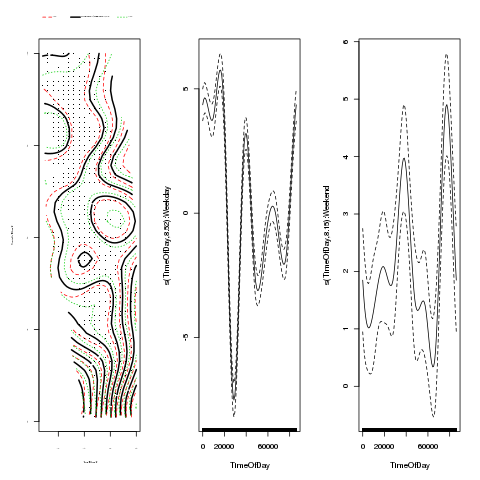

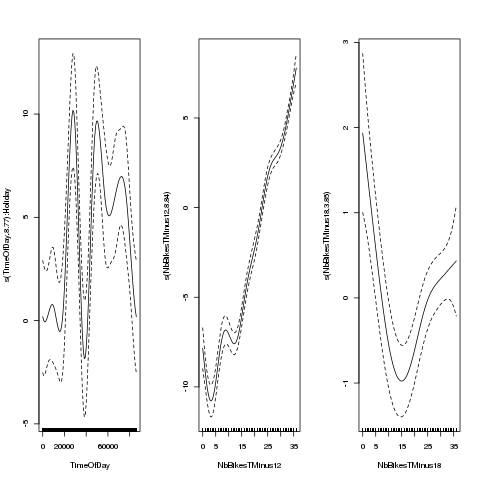

In [79]:
%%R

library(mgcv)

gamModel <- mgcv::gam(NbBikes ~ 
                      s(TempTMinus12, HumidityTMinus12, bs='tp') 
                      + s(TimeOfDay, by=Weekday, bs='cc')                  
                      + s(TimeOfDay, by=Weekend, bs='cc')               
                      + s(TimeOfDay, by=Holiday, bs='cc')               
                      + s(NbBikesTMinus12, bs='tp')
                      + s(NbBikesTMinus18, bs='tp')                      
                      + DistNbBikes + CollNbBikes
                      ,data=training)

print(summary(gamModel))

p_val <- predict(gamModel, newdata=validation)
error <- validation$NbBikes - p_val
rmse <- function(error)
{
    sqrt(mean(error^2))
}
print(rmse(error))
    
layout(matrix(1:3, ncol = 3))
plot(gamModel, scale = 0)
layout(1)
    
#layout(matrix(1:3, ncol = 3))
#acf(resid(gamModel), lag.max = 36, main = "ACF")
#pacf(resid(gamModel), lag.max = 36, main = "pACF")
#layout(1)
    
#gamModel$lme

## Bicycle Redistribution

In [49]:
start_time = time.time()

distributed = pickle.load(open('data/parsed/distributed_dataset_final.p', 'rb'))
distributed.sort_values(by=['Id', 'Timestamp'], inplace=True)
distributed = distributed.query('NbBikes != 0')
distributed.set_index(['Id', 'Timestamp'], inplace=True)
distributed.drop(['ShortName', 'Name'], axis=1, inplace=True)

collected = pickle.load(open('data/parsed/collected_dataset_final.p', 'rb'))
collected.sort_values(by=['Id', 'Timestamp'], inplace=True)
collected = collected.query('NbBikes != 0')
collected.set_index(['Id', 'Timestamp'], inplace=True)
collected.drop(['ShortName', 'Name'], axis=1, inplace=True)

end_time = time.time()
print 'Opening redistribution data took %s' % (end_time - start_time)

Opening redistribution data took 0.917232990265


In [50]:
station_ids = readings.index.get_level_values('Id').unique().tolist()
station_ids = station_ids[0:100]
stations_ids = ['BikePoints_374']

In [51]:
# choose the columns to use in the model
boolean_cols_mid = ['Weekday', 'Weekend', 'Holiday']
numeric_cols_mid = ['HumidityTMinus12', 'TempTMinus12', 'TimeOfDay', 'NbBikesTMinus12', 'NbBikesTMinus18']
pred_col_mid = 'NbBikes'

feature_cols_mid = numeric_cols_mid + boolean_cols_mid
cols_mid = [pred_col_mid] + feature_cols_mid

# select the columns chosen columns
readings_mid = readings[cols_mid].copy()

# remove na
readings_mid.dropna(inplace=True)

readings_mid = readings_mid.loc[stations_ids]

In [52]:
dist_sum = np.zeros(len(readings_mid))
dist_events = np.zeros(len(readings_mid))
coll_sum = np.zeros(len(readings_mid))
coll_events = np.zeros(len(readings_mid))

period = 1
i = 0
for idx, row in readings_mid.iterrows():
    station_id, end = idx
    start = end - pd.Timedelta(minutes=5*period)
    
    if station_id in distributed.index:    
        distributed_window = distributed.loc[station_id].loc[start:end]
        dist_sum[i] = distributed_window.sum()
        dist_events[i] = distributed_window.count() 
    
    if station_id in collected.index:    
        collected_window = collected.loc[station_id].loc[start:end]
        coll_sum[i] = collected_window.sum()
        coll_events[i] = collected_window.count()  
    
    i+=1
    
readings_mid['DistSumTMinus6'] = dist_sum
readings_mid['DistEvtTMinus6'] = dist_events
readings_mid['CollSumTMinus6'] = coll_sum
readings_mid['CollEvtTMinus6'] = coll_events

In [53]:
readings_mid.to_csv('test.csv')
print 'a'

a


In [54]:
gam_formula_mid = "NbBikes ~ s(TempTMinus12, HumidityTMinus12, bs='tp') + s(TimeOfDay, by=Weekday, bs='tp') "
gam_formula_mid += "+ s(TimeOfDay, by=Weekend, bs='tp') + s(TimeOfDay, by=Holiday, bs='tp') + s(NbBikesTMinus12, bs='tp') "
gam_formula_mid += "+ s(NbBikesTMinus18, bs='tp')"

station_ids = readings_mid.index.get_level_values('Id').unique()        
results_mid = model(readings_mid, station_ids, gam_formula_mid, feature_cols_mid, pred_col_mid)

pd.DataFrame(results_mid)[['Id', 'GAM', 'LM']].mean()

Fitting BikePoints_374


GAM    8.003193
LM     8.562069
dtype: float64

In [55]:
gam_formula_mid = "NbBikes ~ s(TempTMinus12, HumidityTMinus12, bs='tp') + s(TimeOfDay, by=Weekday, bs='tp') "
gam_formula_mid += "+ s(TimeOfDay, by=Weekend, bs='tp') + s(TimeOfDay, by=Holiday, bs='tp') + s(NbBikesTMinus12, bs='tp') "
gam_formula_mid += "+ s(NbBikesTMinus18, bs='tp') + DistSumTMinus6 + CollSumTMinus6 "

station_ids = readings_mid.index.get_level_values('Id').unique()        
results_mid = model(readings_mid, station_ids, gam_formula_mid, feature_cols_mid, pred_col_mid)

pd.DataFrame(results_mid)[['Id', 'GAM', 'LM']].mean()

Fitting BikePoints_374


GAM    8.003409
LM     8.562069
dtype: float64

In [56]:
gam_formula_mid = "NbBikes ~ s(TempTMinus12, HumidityTMinus12, bs='tp') + s(TimeOfDay, by=Weekday, bs='tp') "
gam_formula_mid += "+ s(TimeOfDay, by=Weekend, bs='tp') + s(TimeOfDay, by=Holiday, bs='tp') + s(NbBikesTMinus12, bs='tp') "
gam_formula_mid += "+ s(NbBikesTMinus18, bs='tp') + DistEvtTMinus6 + CollEvtTMinus6"

station_ids = readings_mid.index.get_level_values('Id').unique()        
results_mid = model(readings_mid, station_ids, gam_formula_mid, feature_cols_mid, pred_col_mid)

pd.DataFrame(results_mid)[['Id', 'GAM', 'LM']].mean()

Fitting BikePoints_374


GAM    8.004091
LM     8.562069
dtype: float64

In [57]:
gam_formula_mid = "NbBikes ~ s(TempTMinus12, HumidityTMinus12, bs='tp') + s(TimeOfDay, by=Weekday, bs='tp') "
gam_formula_mid += "+ s(TimeOfDay, by=Weekend, bs='tp') + s(TimeOfDay, by=Holiday, bs='tp') + s(NbBikesTMinus12, bs='tp') "
gam_formula_mid += "+ s(NbBikesTMinus18, bs='tp') + DistSumTMinus6 + CollSumTMinus6 + DistEvtTMinus6 + CollEvtTMinus6"

station_ids = readings_mid.index.get_level_values('Id').unique()        
results_mid = model(readings_mid, station_ids, gam_formula_mid, feature_cols_mid, pred_col_mid)

pd.DataFrame(results_mid)[['Id', 'GAM', 'LM']].mean()

Fitting BikePoints_374


GAM    8.002294
LM     8.562069
dtype: float64